In [24]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mpl_finance as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import style
import bs4 #beautifulsoup4
import sklearn #scikit_learn
import numpy as np
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from scipy.stats import pearsonr

In [25]:
style.use('ggplot')

In [26]:
start = dt.datetime(2008,1,1)
end = dt.datetime(2017,12,31)

In [27]:
df_pfe= web.DataReader('PFE','quandl', start,end)
df_mrk= web.DataReader('MRK','quandl', start,end)
df_jnj= web.DataReader('JNJ','quandl', start,end)
df_abbv= web.DataReader('ABBV','quandl', start,end)
df_pfe

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,36.230,36.4900,36.220,36.220,11337557.0,0.00,1.0,36.230000,36.490000,36.220000,36.220000,11337557.0
2017-12-28,36.360,36.5300,36.250,36.370,6574788.0,0.00,1.0,36.360000,36.530000,36.250000,36.370000,6574788.0
2017-12-27,36.310,36.4600,36.230,36.330,8132093.0,0.00,1.0,36.310000,36.460000,36.230000,36.330000,8132093.0
2017-12-26,36.090,36.2700,35.950,36.210,10885234.0,0.00,1.0,36.090000,36.270000,35.950000,36.210000,10885234.0
2017-12-22,36.260,36.3800,36.050,36.140,8575461.0,0.00,1.0,36.260000,36.380000,36.050000,36.140000,8575461.0
2017-12-21,36.585,36.6000,36.190,36.240,14577781.0,0.00,1.0,36.585000,36.600000,36.190000,36.240000,14577781.0
2017-12-20,36.980,37.1400,36.425,36.460,14288514.0,0.00,1.0,36.980000,37.140000,36.425000,36.460000,14288514.0
2017-12-19,37.170,37.2300,36.880,36.940,13816019.0,0.00,1.0,37.170000,37.230000,36.880000,36.940000,13816019.0
2017-12-18,37.160,37.3500,37.060,37.130,16602604.0,0.00,1.0,37.160000,37.350000,37.060000,37.130000,16602604.0


<IPython.core.display.Javascript object>


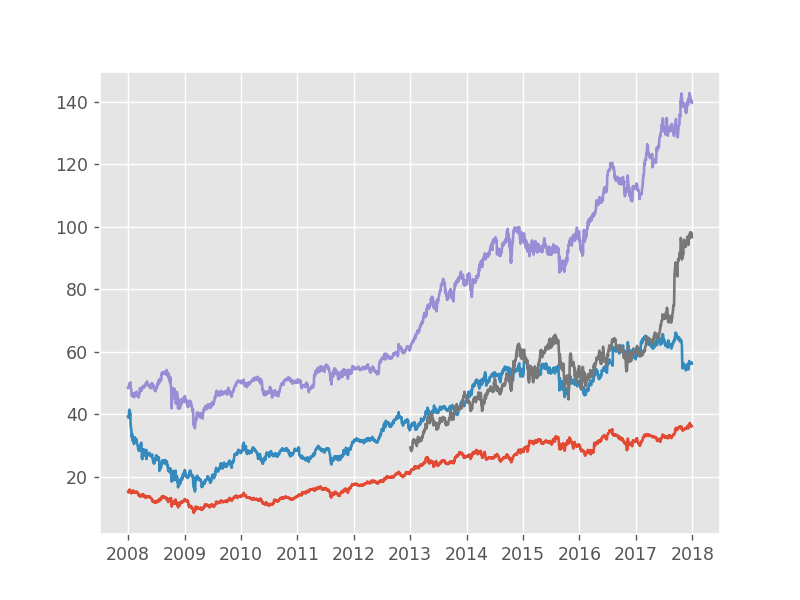

In [30]:
df_pfe.head()
plt.plot(df_pfe.index, df_pfe["AdjClose"])
plt.plot(df_mrk.index, df_mrk["AdjClose"])
plt.plot(df_jnj.index, df_jnj["AdjClose"])
plt.plot(df_abbv.index, df_abbv["AdjClose"])

In [32]:
pharmaceutical_df = pd.DataFrame({"PFE_Adjclose":df_pfe["AdjClose"],
                                  "MRK_Adjclose":df_mrk["AdjClose"],
                                  "JNJ_Adjclose":df_jnj["AdjClose"],
                                  "ABBV_Adjclose":df_abbv["AdjClose"]
                                 
                                 
                                 }) 

pharmaceutical_df_nona = pharmaceutical_df.dropna()
pharmaceutical_df.head()

,ABBV_Adjclose,JNJ_Adjclose,MRK_Adjclose,PFE_Adjclose
Date,,,,
2008-01-02,NaN,48.468590,39.272827,15.132003
2008-01-03,NaN,48.483297,39.238600,15.310337
2008-01-04,NaN,48.417113,38.916860,15.079163
2008-01-07,NaN,49.167196,39.649332,15.343362
2008-01-08,NaN,49.226026,40.840455,15.501882


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268C4C1AE10>,
      dtype=object)

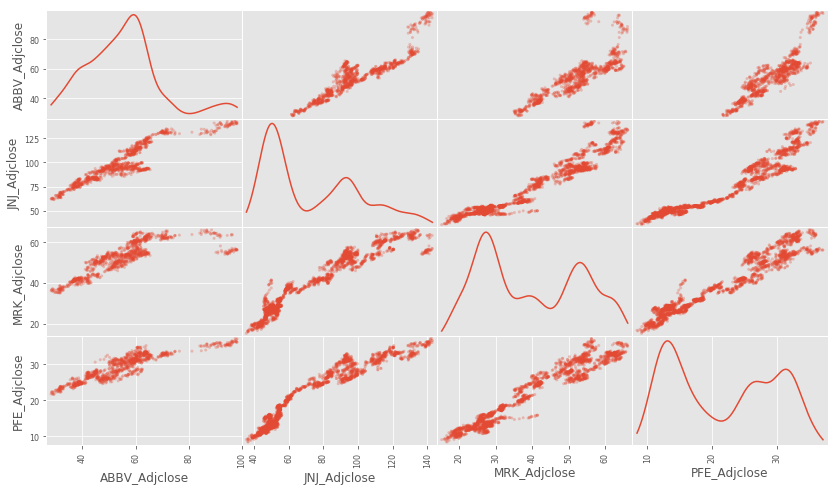

In [9]:
pd.scatter_matrix(pharmaceutical_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [10]:
correlation_df = pharmaceutical_df.corr(method="pearson")
correlation_df.head()

,ABBV_Adjclose,JNJ_Adjclose,MRK_Adjclose,PFE_Adjclose
ABBV_Adjclose,1.000000,0.909595,0.793707,0.891463
JNJ_Adjclose,0.909595,1.000000,0.958152,0.954288
MRK_Adjclose,0.793707,0.958152,1.000000,0.967072
PFE_Adjclose,0.891463,0.954288,0.967072,1.000000


In [22]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

In [23]:
calculate_pvalues(pharmaceutical_df)

,ABBV_Adjclose,JNJ_Adjclose,MRK_Adjclose,PFE_Adjclose
ABBV_Adjclose,0,0,3.31352e-273,0
JNJ_Adjclose,0,0,0,0
MRK_Adjclose,3.31352e-273,0,0,9.12209e-304
PFE_Adjclose,0,0,9.12209e-304,0


NameError: name 'df' is not defined

NameError: name 'df' is not defined

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


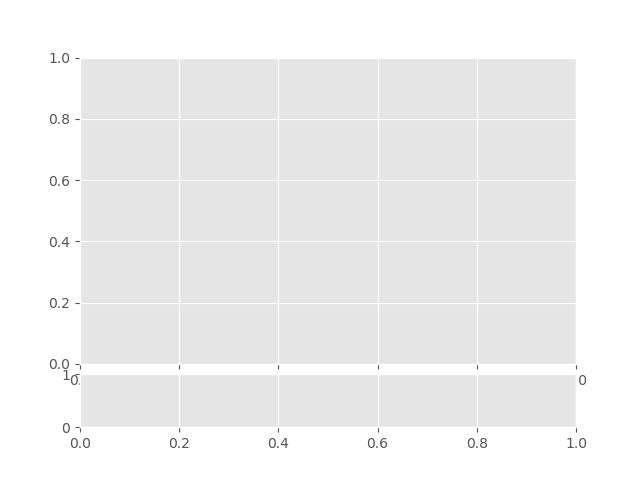

NameError: name 'df' is not defined

In [32]:
df_ohlc=df['AdjClose'].resample('10D').ohlc()

NameError: name 'df' is not defined

In [ ]:
df_volume = df['Volume'].resample('10D').sum()

In [ ]:
print(df_ohlc.head())

In [ ]:
df_ohlc.index=df_ohlc.index.map(date2num)

In [44]:
df_ohlc.head()

,open,high,low,close,Date
Date,,,,,
733952.0,23.89,23.89,15.80,17.46,733952.0
733962.0,17.40,20.64,17.05,20.64,733962.0
733972.0,21.91,21.91,20.22,20.72,733972.0
733982.0,20.35,21.95,19.59,19.59,733982.0
733992.0,19.60,19.60,17.60,19.15,733992.0


In [ ]:
ax1.xaxis_date()

In [ ]:
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')

In [58]:
ax2.fill_between(df_volume.index.map(date2num),df_volume.values,0)
plt.show()